In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap
# import sarchl
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
single_data = pd.read_csv('./slowdown_single.csv',index_col=0)
data = pd.concat([single_data,pd.read_csv('./slowdown_unlimited.csv',index_col=0)])
data

Benchmark        0        1        2          resources
0       ATAX     1166    68797   103734      single thread
1         BS    85689   383658   670185      single thread
2        FWT    71423   724290   990728      single thread
3        FIR   430829  2022309  3151808      single thread
4        FLW    85181   340696   598706      single thread
5         KM    52908   808511  1236707      single thread
6         MM   239865   807454  1111454      single thread
7         MT    17706   603736   815476      single thread
8         PR  1954734   989881  1543084      single thread
9       ReLU        0   546053   774553      single thread
10      SPMV     8289   788016  1169290      single thread
0       ATAX     1203    70180   129449  unlimited threads
1         BS    92858   366206   383165  unlimited threads
2        FWT    71474   670688   399260  unlimited threads
3        FIR   412936  1948476  1012757  unlimited threads
4        FLW    93128   327024   346480  unlimited threads
5         KM    49191   772553   591238  unlimited threads
6         MM   222013   794153   415059  unlimited threads
7         MT    17032   559779   381019  unlimited threads
8         PR  1810912   954810   703882  unlimited threads
9       ReLU        0   512422   483893  unlimited threads
10      SPMV     7735   700674   487447  unlimited threads

In [10]:
data = data.melt(id_vars=['Benchmark','resources'],value_vars=['0','1','2'])
data.columns=['Benchmark','resources','settingID','slowdown']

In [11]:
data['combination']=data['settingID']+ '+' + data['resources']
data = data[['Benchmark','combination','slowdown']]

In [12]:
# data=data.pivot(index='Benchmark',columns='combination',values='realtime')
# data.reset_index(inplace=True)
# data

In [13]:
data

Benchmark          combination  slowdown
0       ATAX      0+single thread      1166
1         BS      0+single thread     85689
2        FWT      0+single thread     71423
3        FIR      0+single thread    430829
4        FLW      0+single thread     85181
..       ...                  ...       ...
61        MM  2+unlimited threads    415059
62        MT  2+unlimited threads    381019
63        PR  2+unlimited threads    703882
64      ReLU  2+unlimited threads    483893
65      SPMV  2+unlimited threads    487447

[66 rows x 3 columns]

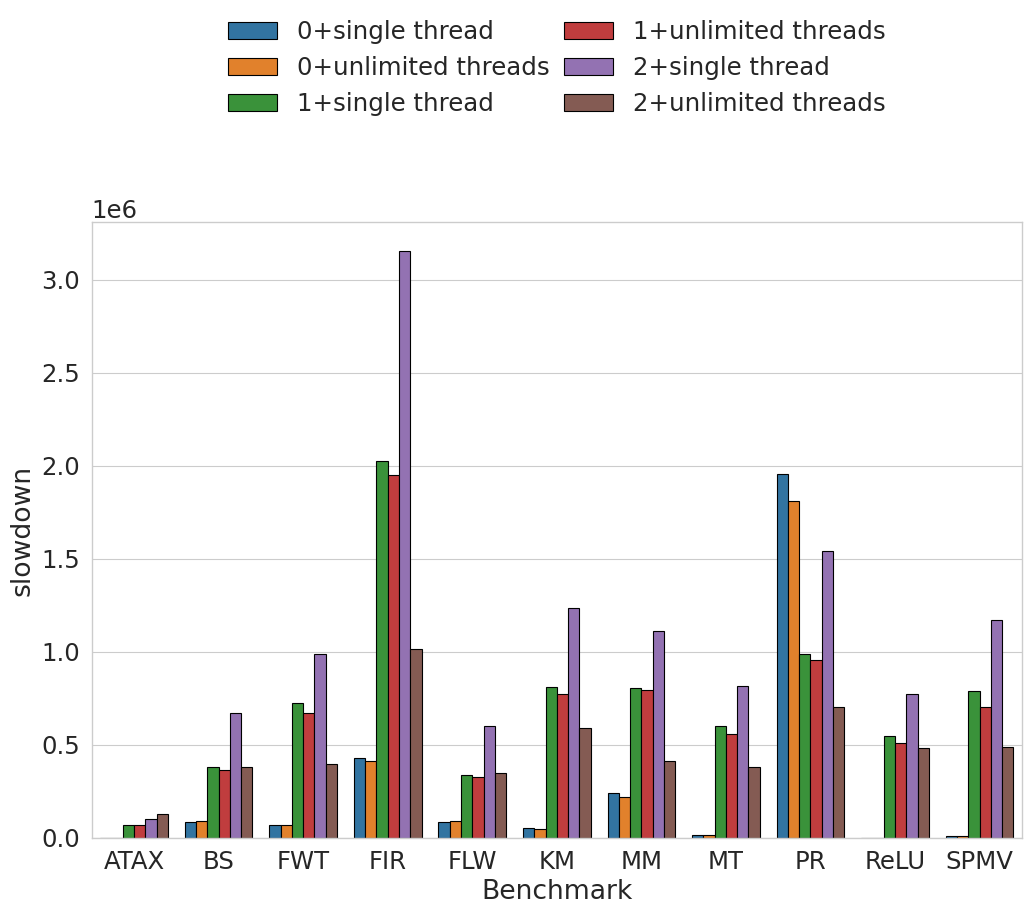

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=data, 
            x='Benchmark', hue='combination', y='slowdown', 
         ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.25), loc=10, ncol=2)